In [2]:
import os

# Path to the dataset file
data_file_path = os.path.join("data", "data.txt")

# Read the poem dataset
with open(data_file_path, "r") as file:
    poem_text = file.read()

print("Loaded Poem Dataset:")
print(poem_text)


Loaded Poem Dataset:
Roses are red,
Violets are blue,
The sky is clear,
And so are you.

The moon is bright,
The stars do shine,
The night is calm,
A perfect sign.


In [53]:
import os
data_file_path = os.path.join("data", "data.txt")
with open(data_file_path, "r") as file:
    poem_text = file.read()
words = poem_text.split(" ")
len(words)
set_word = set(words)




In [61]:
import numpy as np
from collections import Counter

def get_pair_frequencies(tokens):
    """Compute frequencies of adjacent token pairs."""
    pairs = [tuple(tokens[i:i+2]) for i in range(len(tokens) - 1)]
    return Counter(pairs)

def merge_pair(tokens, pair, new_token):
    """Merge the most frequent pair in the token list."""
    merged_tokens = []
    i = 0
    while i < len(tokens):
        if i < len(tokens) - 1 and (tokens[i], tokens[i+1]) == pair:
            merged_tokens.append(new_token)
            i += 2  # Skip next token as it's merged
        else:
            merged_tokens.append(tokens[i])
            i += 1
    return merged_tokens

def byte_pair_encoding(text, num_merges):
    """Train BPE and return tokens, vocab, and learned merges."""
    tokens = list(text)  # Initialize as character tokens
    vocab = set(tokens)  # Initial vocabulary
    merges = {}  # Store merge rules

    for _ in range(num_merges):
        pair_freqs = get_pair_frequencies(tokens)
        if not pair_freqs:
            break
        most_frequent_pair = max(pair_freqs, key=pair_freqs.get)

        new_token = "".join(most_frequent_pair)  # Merge pair into a new token
        vocab.add(new_token)  # Add new token to vocabulary
        merges[most_frequent_pair] = new_token  # Store merge step

        tokens = merge_pair(tokens, most_frequent_pair, new_token)

    return tokens, vocab, merges

def tokenize_with_bpe(text, merges):
    """Tokenizes text using learned BPE merges."""
    tokens = list(text)  # Start with character-level tokens

    # Apply stored merges in order
    while True:
        pair_freqs = get_pair_frequencies(tokens)
        if not pair_freqs:
            break
        
        merge_candidates = [(pair, merges[pair]) for pair in pair_freqs if pair in merges]
        if not merge_candidates:
            break

        # Apply the first merge in stored order
        pair_to_merge, new_token = merge_candidates[0]
        tokens = merge_pair(tokens, pair_to_merge, new_token)

    return tokens

# Example usage
text = poem_text
num_merges = 300
tokens, vocab, merges = byte_pair_encoding(text, num_merges)
toks = tokenize_with_bpe(text=poem_text, merges=merges)
print(toks)
tok_idx = [tokens.index(i) for i in toks]
# print("Final Tokens:", tokens)
# print("Final Vocabulary:", vocab)


['I', 's ', 'th', 'i', 's ', 'th', 'e ', 'rea', 'l', ' ', 'life ', 'I', 's ', 'th', 'i', 's ', 'just ', 'f', 'an', 't', 'as', 'y\n', 'C', 'a', 'u', 'ght ', 'in', ' a', ' ', 'l', 'and', 's', 'li', 'd', 'e, ', 'no', ' ', 'es', 'ca', 'p', 'e ', 'from', ' rea', 'li', 't', 'y\n', 'O', 'p', 'en ', 'your ', 'ey', 'es', ', ', 'lo', 'o', 'k ', 'up', ' to', ' ', 'th', 'e ', 's', 'k', 'i', 'es ', 'and', ' s', 'ee', '\n', "I'm just a poor bo", 'y, ', 'I ', 'n', 'ee', 'd ', 'no', ' s', 'y', 'm', 'p', 'a', 'th', 'y\n', 'B', 'e', 'ca', 'us', 'e ', "I'm ", 'easy ', 'come, easy go, ', 'little ', 'hi', 'gh', ', ', 'little ', 'low', '\n', 'Any w', 'a', 'y ', 'th', 'e ', 'w', 'in', 'd ', 'b', 'low', 's do', 'es', "n't ", 'rea', 'll', 'y ', 'm', 'a', 'tt', 'er', ' to', ' me, ', 't', 'o me\n', '\nMama, ', 'just ', 'k', 'ill', 'e', 'd', ' a', ' m', 'an', '\n', 'P', 'ut ', 'a ', 'gun', ' again', 's', 't ', 'his ', 'h', 'ead', ', ', 'p', 'u', 'll', 'e', 'd ', 'm', 'y t', 'ri', 'g', 'g', 'er', ', no', 'w ', 'h'

ValueError: 'gh' is not in list

In [62]:
len(vocab)

352

In [63]:
tokens

['Is this the real life Is this just fantasy\nCaught in',
 ' ',
 'a ',
 'l',
 'and',
 's',
 'li',
 'd',
 'e, ',
 'no',
 ' ',
 'es',
 'ca',
 'p',
 'e ',
 'from',
 ' rea',
 'li',
 't',
 'y\n',
 'O',
 'p',
 'en ',
 'your ',
 'ey',
 'es',
 ', ',
 'lo',
 'o',
 'k ',
 'up',
 ' to',
 ' the ',
 's',
 'k',
 'i',
 'es ',
 'and s',
 'ee\n',
 "I'm just a poor bo",
 'y, ',
 'I ',
 'n',
 'ee',
 'd ',
 'no',
 ' s',
 'y',
 'm',
 'p',
 'a',
 'th',
 'y\n',
 'B',
 'e',
 'ca',
 'us',
 'e ',
 "I'm ",
 'easy ',
 'come, easy go, ',
 'little ',
 'hi',
 'g',
 'h, ',
 'little ',
 'low',
 '\n',
 'Any way the wind blow',
 's do',
 'es',
 "n't ",
 'rea',
 'lly matter',
 ' to',
 ' me, ',
 't',
 'o me\n',
 '\nMama, ',
 'just ',
 'k',
 'ill',
 'e',
 'd ',
 'a m',
 'an',
 '\n',
 'P',
 'ut ',
 'a ',
 'gun',
 ' again',
 's',
 't ',
 'his ',
 'h',
 'ead',
 ', ',
 'p',
 'u',
 'll',
 'e',
 'd',
 ' m',
 'y t',
 'ri',
 'g',
 'g',
 'er',
 ', no',
 'w ',
 'h',
 "e's ",
 'd',
 'ead',
 '\nMama, ',
 'life ',
 'ha',
 'd ',
 'just 

In [60]:
import pandas as pd
df = pd.read_csv("/Users/hamza.mahmood/Developer/deep_learning_course/LSTM-from-Scratch-using-Numpy/data/5/csv/PostMalone.csv")
# combined_string = "\n".join(df["Lyric"].astype(str))
# print(combined_string)
df

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Post Malone,​​rockstar,beerbongs & bentleys,2017.0,2017-09-15,post malone hahahahaha tank god ayy ayy post...
1,1,Post Malone,White Iverson,Stoney (Deluxe),2015.0,2015-02-04,double ot i'm a new three saucin' saucin' i'...
2,2,Post Malone,Congratulations,Stoney (Deluxe),2016.0,2016-11-04,post malone mmmmm yeah yeah mmmmm yeah hey p...
3,3,Post Malone,Psycho,beerbongs & bentleys,2018.0,2018-02-23,post malone damn my ap goin' psycho lil' mama ...
4,4,Post Malone,I Fall Apart,Stoney (Deluxe),2016.0,2016-12-09,ooh i fall apart ooh yeah mmm yeah she told ...
...,...,...,...,...,...,...,...
143,143,Post Malone,Lithium,NaN,2020.0,2020-04-24,i'm so happy 'cause today i found my friends t...
144,144,Post Malone,Something in the Way,NaN,2020.0,2020-04-24,verse underneath the tarp has sprung a leak a...
145,145,Post Malone,In Bloom,NaN,2020.0,2020-04-24,sell the kids for food weather changes moods s...
146,146,Post Malone,Territorial Pissings,NaN,2020.0,2020-04-24,when i was an alien cultures weren't opinions ...


In [58]:
with open("/Users/hamza.mahmood/Developer/deep_learning_course/LSTM-from-Scratch-using-Numpy/data/postmalone.txt", "w") as f:
    f.write(combined_string)

In [98]:
from src.basic import BasicTokenizer
tokenizer = BasicTokenizer()
text = poem_text
tokenizer.train(text, 256 + 200) # 256 are the byte tokens, then do 3 merges
tokens = tokenizer.encode(poem_text)
# print(tokenizer.decode(tokens[5:10]))
# print(len(tokens))

for tok in set(tokens):
    print(tok, tokenizer.decode([tok]))
# tokenizer.save("toy")
# writes two files: toy.model (for loading) and toy.vocab (for viewing)

10 

32  
40 (
65 A
66 B
67 C
68 D
69 E
70 F
71 G
72 H
73 I
74 J
76 L
78 N
79 O
80 P
83 S
84 T
87 W
89 Y
91 [
93 ]
97 a
98 b
99 c
100 d
101 e
102 f
103 g
104 h
105 i
107 k
108 l
109 m
110 n
111 o
112 p
114 r
115 s
116 t
117 u
118 v
119 w
121 y
122 z
256 , 
257 t 
258 e 
259  m
260  t
261 ou
262 ll
263 hi
264 go
265 an
266 no
267 er
268 ea
269 li
270 s 
271 you
272 y 
273 et 
274 e

275 or
276 a 
277 d 
278 tt
279 e, 
280 wi
281 you 
282 om
283 h, 
284 am
285 me 
286 o 
287 us
288 ll 
289 on
290 ver
291 go

292  th
293 ust 
294 y

295 in
296 lo
297 or 
298 , no
299 ar
300 hin
301 ) 
303  the 
304 rea
305 just 
306 I'
308 bo
309  ma
310  s
312 a, 
313  a
314 ve 
315 not 
316 ever
317 s t
318 gh
319  rea
320 and 
324 lly matter
325  me

326 Mam
327 ut 
328 hing
329 oh
330 will 
334 Galile
338 not let you go
(
339 go) 
340 , no, no
341 es
342 fr
343 en
344 I'm 
347 a poor 
348 y, 
349 sy 
350 com
351 low
352 do
353 't 
354  me, 
355 Mama, 
356 ill
357 a m
358 ro
361 thing really matter
362

In [97]:
set(tokenizer.encode(poem_text))

{10,
 32,
 40,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 76,
 78,
 79,
 80,
 83,
 84,
 87,
 89,
 91,
 93,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 107,
 108,
 109,
 110,
 111,
 112,
 114,
 115,
 116,
 117,
 118,
 119,
 121,
 122,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 303,
 304,
 305,
 306,
 308,
 309,
 310,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 334,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 371,
 372,
 373,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 383,
 384,
 385,
 386,
 389,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,


In [95]:
import numpy as np

vocab_size = 5
probs = np.array([0.1, 0.2, 0.3, 0.1, 0.3])/0.7  # Probabilities for each token

next_idx = np.random.choice(range(vocab_size), p=probs.ravel())
print("Chosen index:", next_idx)


ValueError: probabilities do not sum to 1

In [3]:
import numpy as np
import os
from src.LSTM import LSTMLayer
from src.nn import FullyConnectedLayer
from src.Activation import softmax
from src.Loss import CrossEntropy  # Loss functions
from src.perplexity import perplexity
import pandas as pd
import re
from matplotlib import pyplot as plt



def clean_text(text):
    """
    Removes all punctuation and special characters from the input text.
    - Keeps only alphanumeric characters and spaces.
    """
    # Use regex to remove all non-alphanumeric characters except spaces
    cleaned_text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    # Replace multiple spaces with a single space
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()
    return cleaned_text

class WordTokenizer:
    def __init__(self, text) -> None:
        self.text = " ".join(text.split("\n"))
        self.words = self.text.split(" ")
    
    def encode(self, text):
        toks = []
        for word in text.split(" "):
            toks.append(self.words.index(word))
        return np.array(toks)
    
    def decode(self, toks):
        words = ""
        if isinstance(toks, list) or isinstance(toks, np.ndarray):
            for tok in toks:
                words += self.words[tok]
                words += " "
        else:
            words = self.words[toks]
        return words


def sample_top_k(probs, k=5):
    """Select one of the top-k probable indices randomly based on their probabilities."""
    # Get the indices of the top-k probabilities
    top_k_indices = np.argsort(probs)[-k:]  # Sort and pick last k (highest)
    
    # Normalize probabilities for top-k
    top_k_probs = probs[top_k_indices]
    top_k_probs /= top_k_probs.sum()  # Convert to valid probability distribution
    
    # Sample from the top-k tokens
    chosen_idx = np.random.choice(top_k_indices, p=top_k_probs)
    
    return chosen_idx


# -----------------------------
# 1. Load the Poem Dataset
# -----------------------------
data_file_path = os.path.join("data", "data.txt")
with open(data_file_path, "r") as file:
    poem_text = file.read()
    poem_text = clean_text(poem_text)
    poem_text = poem_text.split("\n")
    poem_text = " ".join(poem_text)

# tokenizer = BasicTokenizer()
# tokenizer.train(poem_text, 256 + 200) # 256 are the byte tokens, then do 200 merges
tokenizer = WordTokenizer(text=poem_text)
tokens = tokenizer.encode(poem_text)
# -----------------------------
# 2. Build Character-Level Vocabulary
# -----------------------------
# words = poem_text.split(" ")
# s = set(words)
# chars = sorted(list(tokens))
vocab_size = len(set(tokens))
vocab = list(set(tokens))
# vocab = {}
# for tok in tokens:
#     vocab[tok] = tokenizer.decode([tok])
print("Vocabulary size:", vocab_size)

# char_to_idx = {ch: i for i, ch in enumerate(chars)}
# idx_to_char = {i: ch for i, ch in enumerate(chars)}


# -----------------------------
# 3. Hyperparameters and Model Setup
# -----------------------------
sequence_length = 5  # Length of input sequences
hidden_dim = 128      # Size of LSTM hidden state
learning_rate = 0.01
epochs = 50

params_str = f"sq_{sequence_length}-hd_{hidden_dim}-lr_{learning_rate}-ep_{epochs}"

input_dim = vocab_size  # One-hot vector size equals vocab size

# Initialize LSTM layer and output layer (maps hidden state to vocabulary distribution)
lstm = LSTMLayer(input_dim, hidden_dim)
output_layer = FullyConnectedLayer(hidden_dim, vocab_size)
sftmx = softmax()
loss_fn = CrossEntropy()
losses = []
perpelexities = []
# -----------------------------
# 4. Utility Functions
# -----------------------------
def one_hot(index, dim):
    """Return one-hot column vector for a given index."""
    # if len(index) == 1:   # handle batching
    vec = np.zeros((dim, 1))
    vec[index] = 1
    return vec


# -----------------------------
# 5. Prepare Training Sequences
# -----------------------------
input_sequences = []
target_sequences = []
for i in range(0, len(tokens) - sequence_length):
    
    input_seq = tokens[i:i+sequence_length]
    target_seq = tokens[i+1:i+sequence_length+1]
   
    input_sequences.append(input_seq)
    target_sequences.append(target_seq)

input_sequences = np.array(input_sequences)
target_sequences = np.array(target_sequences)




# -----------------------------
# 6. Training Loop with BPTT
# -----------------------------
print("\nStarting training...\n")
for epoch in range(epochs):
    total_loss = 0
    epoch_perpelexities = []
    # Process each training sequence one by one.
    
    for seq_idx in range(len(input_sequences)):
        input_tokens = input_sequences[seq_idx]
        target_tokens = target_sequences[seq_idx]
       

        # Initialize hidden and cell states
        h_state = np.zeros((hidden_dim, 1))
        c_state = np.zeros((hidden_dim, 1))
        
        # Lists to store forward pass values for backpropagation.
        lstm_caches = []    # stores a copy of lstm.cache for each time step
        h_states = []       # hidden states per time step
        output_probs = []   # output probabilities per time step

        # ----- Forward Pass -----
        for t in range(sequence_length):
            # print(f"input_indices[t]: {input_tokens[t]}\tt: {t}")
            # exit()
            x_t = one_hot(vocab.index(input_tokens[t]), vocab_size) # index of token in input_induce
            
            h_state, c_state = lstm.forward(x_t, h_state, c_state)
            # Store a copy of hidden state and cache for time step t.
            h_states.append(h_state.copy())
            lstm_caches.append(lstm.cache.copy())
            # Compute output layer forward pass.
            logits = output_layer.forward(h_state.T)  # shape: (1, vocab_size)
            probs = sftmx.forward(logits)
            
            
            # exp_logits = np.exp(logits - np.max(logits))
            # probs = exp_logits / np.sum(exp_logits)
            output_probs.append(probs)
        
        outputs = np.vstack(output_probs)  # shape: (sequence_length, vocab_size)
        
        # Create one-hot targets for the sequence.
        target_one_hot = np.zeros((sequence_length, vocab_size))
        for t, target_idx in enumerate(target_tokens):
            target_one_hot[t, vocab.index(target_idx)] = 1
        
        
        target_probs = [probs[0][vocab.index(i)] for i in target_tokens]
        perp = perplexity(probabilities=target_probs)
        epoch_perpelexities.append(perp)
        
        
        
        # Compute loss.
        loss = loss_fn.eval(target_one_hot, outputs)
        total_loss += loss
        
        # ----- Backpropagation -----
        # First: Backpropagate through the output layer for each time step.
        d_hidden_list = []  # gradients with respect to hidden state from output layer
        # Accumulate gradients for the output layer parameters.
        grad_W_accum = np.zeros_like(output_layer.W)
        grad_b_accum = np.zeros_like(output_layer.b)
        
        for t in range(sequence_length):
            # Compute derivative of softmax cross-entropy:
            # For softmax + cross-entropy, gradient w.r.t. logits is (predicted - target)
            target_row = np.zeros((1, vocab_size))
            target_row[0, vocab.index(target_tokens[t])] = 1
            d_logits = output_probs[t] - target_row  # shape: (1, vocab_size)
            # Backprop through output layer.
            d_hidden = output_layer.backward(d_logits)  # shape: (1, hidden_dim)
            # Store d_hidden transposed to match hidden state shape (hidden_dim, 1).
            d_hidden_list.append(d_hidden.T)
            # Accumulate gradients for output layer.
            # The forward input to the output layer was h_states[t].T (shape: (1, hidden_dim)).
            grad_W_accum += np.dot(h_states[t], d_logits)  # (hidden_dim, vocab_size)
            grad_b_accum += d_logits  # (1, vocab_size)
        
        # Update output layer parameters (averaging gradients over time steps).
        output_layer.W -= learning_rate * (grad_W_accum / sequence_length)
        output_layer.b -= learning_rate * (grad_b_accum / sequence_length)
        
        # Second: Backpropagate through the LSTM in reverse time order.
        # d_h_next and d_c_next are gradients flowing from future time steps.
        d_h_next = np.zeros((hidden_dim, 1))
        d_c_next = np.zeros((hidden_dim, 1))
        for t in reversed(range(sequence_length)):
            # Before calling backward, restore the cache for time step t.
            lstm.cache = lstm_caches[t]
            # Total gradient for current hidden state: from output layer plus gradient from future.
            d_h_total = d_hidden_list[t] + d_h_next
            # Call backward on the LSTM cell.
            d_prev_h, d_x, d_prev_c = lstm.backward(d_h_total, d_c_next)
            d_h_next = d_prev_h  # gradient to pass to previous time step (for h)
            d_c_next = d_prev_c  # gradient to pass to previous time step (for c)
            # (d_x could be used if an embedding layer is present)
    
    avg_loss = total_loss / len(input_sequences)
    avg_perp = sum(epoch_perpelexities)/len(epoch_perpelexities)
    print(f"Epoch {epoch+1}/{epochs} - loss: {avg_loss:.4f}\t perplexity: {avg_perp:.4f}")
    losses.append(avg_loss)
    perpelexities.append(avg_perp)

# -----------------------------
# 7. Text Generation Function
# -----------------------------
def generate_text(seed_text, length=100, temp=0.7):
    # seed_text = seed_text.split(" ")
    generated_text = seed_text
    h_state = np.zeros((hidden_dim, 1))
    c_state = np.zeros((hidden_dim, 1))
    seed_text_tokens = tokenizer.encode(seed_text)
    generated_tokens = []
    # Feed seed text through the model.
    for tok in seed_text_tokens:
        x = one_hot(vocab.index(tok), vocab_size) #char_to_idx
        h_state, c_state = lstm.forward(x, h_state, c_state)
    
    current_token = seed_text_tokens[-1]
    for _ in range(length):
        x = one_hot(current_token, vocab_size)
        h_state, c_state = lstm.forward(x, h_state, c_state)
        logits = output_layer.forward(h_state.T)
        # exp_logits = np.exp(logits - np.max(logits))
        # probs = exp_logits / np.sum(exp_logits)
        probs = sftmx.forward(logits)
        # next_idx = np.random.choice(range(vocab_size), p=probs.ravel())
        next_idx = sample_top_k(probs=probs.flatten(), k=50)
        # next_idx = np.argmax(probs)
        generated_tokens.append(vocab[int(next_idx)])   
        # # next_idx = np.argmax(probs)
        # next_char = tokenizer.decode([int(next_idx)])
        # print(next_char)
        # generated_text += next_char
        # generated_text += " "
        current_token = next_idx
    return generated_tokens

losses_df =  pd.DataFrame({"losses": losses, "perpelexities": perpelexities})
losses_df.to_csv(f"/Users/hamza.mahmood/Developer/deep_learning_course/LSTM-from-Scratch-using-Numpy/results/{params_str}.csv", index_label=False)

# -----------------------------
# 8. Generate and Print Text
# -----------------------------





Vocabulary size: 195

Starting training...

Epoch 1/50 - loss: 5.2617	 perplexity: 192.8410
Epoch 2/50 - loss: 5.2377	 perplexity: 188.3860
Epoch 3/50 - loss: 5.2148	 perplexity: 184.3481
Epoch 4/50 - loss: 5.1930	 perplexity: 180.6999
Epoch 5/50 - loss: 5.1724	 perplexity: 177.4157
Epoch 6/50 - loss: 5.1529	 perplexity: 174.4710
Epoch 7/50 - loss: 5.1347	 perplexity: 171.8423
Epoch 8/50 - loss: 5.1176	 perplexity: 169.5064
Epoch 9/50 - loss: 5.1018	 perplexity: 167.4407
Epoch 10/50 - loss: 5.0871	 perplexity: 165.6230
Epoch 11/50 - loss: 5.0736	 perplexity: 164.0313
Epoch 12/50 - loss: 5.0612	 perplexity: 162.6442
Epoch 13/50 - loss: 5.0499	 perplexity: 161.4405
Epoch 14/50 - loss: 5.0395	 perplexity: 160.4001
Epoch 15/50 - loss: 5.0300	 perplexity: 159.5038
Epoch 16/50 - loss: 5.0214	 perplexity: 158.7336
Epoch 17/50 - loss: 5.0136	 perplexity: 158.0728
Epoch 18/50 - loss: 5.0065	 perplexity: 157.5065
Epoch 19/50 - loss: 5.0000	 perplexity: 157.0210
Epoch 20/50 - loss: 4.9941	 perple

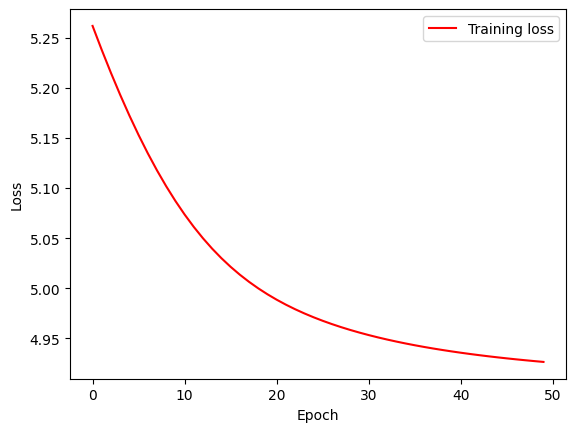

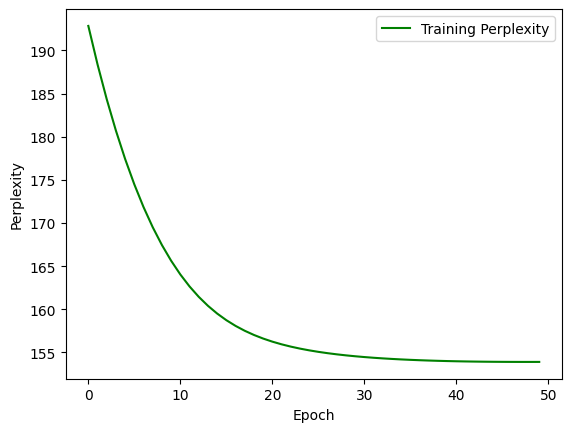

ValueError: 'Hello' is not in list

In [4]:



epoch = np.arange(len(losses))
plt.figure()
plt.plot(epoch, losses, 'r', label='Training loss',)
plt.legend()
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()
plt.figure()
plt.plot(epoch, perpelexities, 'g', label='Training Perplexity',)
plt.legend()
plt.xlabel('Epoch'), plt.ylabel('Perplexity')
plt.show()





In [8]:
seed = "Because"
generated = generate_text(seed, length=10)
print(tokenizer.decode(generated))

you wind let a will no I go Any life 
